# Analysis and Visualization of Netflix content

## Topics

1.0 Importing packages and loading data

2.0 Cleaning the data

    2.1 Checking Null Values
    
    2.2 Visualizing Null Values
    
    2.3 Treating Null Values

3.0 Composition and Comparison Visualisations

    3.1 Visualizing Composition of Content Type (Movies & TV Shows)
    
    3.2 Countries producing maximum content on Netflix
    
    3.3 Country-wise Composition of Content Type
    
    3.4 Visualizing Composition of Content Rating
    
    3.5 Qualitative Distribution of Content Type Across Maturity Ratings
    
    3.6 Quantitative Distribution of Content Type Across Maturity Ratings
    
    3.7 Count of Maturity Ratings for each Content Type
    
    3.8 Composition of Content Ratings
    
4.0 Evolution of Netflix Content & its Type over time

5.0 Study of Genres Correlations

6.0 Distribution of target audiences for each country

    6.1 Studying the gap between release and upload of content in different countries

    6.2 Comparing the netflix content of USA & India

7.0 Word Cloud

8.0 ML Classification Model

9.0 Interpreting the results

## 1.0 Importing packages and loading data
Import all the packages and load the required data downloaded using Kaggle.

In [241]:
!pip install wordcloud

import random
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import plotly.express as px
from sklearn import metrics
import matplotlib.colors
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [242]:
df = pd.read_csv('C:\\Users\\mubas\\Downloads\\netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## 2.0 Cleaning the data
All the found null values will be handled below.

### 2.1 Checking Null Values

In [243]:
#checking for null values
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

### 2.2 Visualizing Null Values

<AxesSubplot:>

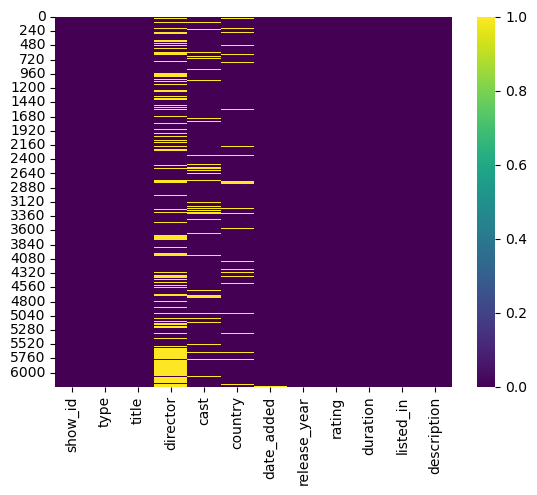

In [244]:
sns.heatmap(df.isnull(),cmap = 'viridis')

### 2.3 Treating Null Values
We have null values in director, cast,country,date_added and rating.So lets deal with it.

In [245]:
df['rating'].value_counts().unique()

array([2027, 1698,  701,  508,  286,  218,  184,  169,  149,  143,   95,
         37,    7,    2], dtype=int64)

The director and cast columns from the data mentioned above don't significantly affect how we view the data or provide much value to our study, so we may eliminate them. Removing two columns won't be a problem because we are just intent on visualising this data. This shouldn't be done frequently, though, as the director and cast of a movie are crucial elements that go into recommending movies to customers and cannot be removed from a recommender system that is being developed.

In [246]:
df.drop(['director','cast'],axis = 1,inplace = True)

In [247]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


We replaced all of the Nan values in the country column with United States because Netflix was founded in the United States and all shows are available on Netflix US. So, instead of deleting the entire column, we simply replaced the values in it to save our data.

In [248]:
df['country'].replace(np.nan, 'United States',inplace  = True)

In [250]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [251]:
df['rating'].value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [252]:
df['listed_in'].value_counts()

Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
                                                   ... 
TV Comedies, TV Dramas, TV Mysteries                  1
Classic Movies, Dramas, LGBTQ Movies                  1
Crime TV Shows, TV Dramas, TV Sci-Fi & Fantasy        1
Docuseries, Reality TV, Teen TV Shows                 1
Reality TV, Spanish-Language TV Shows                 1
Name: listed_in, Length: 461, dtype: int64

As we can see, our rating column only has ten missing values, which we can either drop or replace. Because TV-MA is the most common raing, we can substitute it for all of these nan values.

In [253]:
df['rating'].replace(np.nan, 'TV-MA',inplace  = True)

In [254]:
df.isnull().sum()

show_id          0
type             0
title            0
country          0
date_added      11
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

Now that we've dealt with all of our missing data, let's get started on our data visualisation.

In [255]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## 3.0 Composition and Comparison Visualisations

<AxesSubplot:xlabel='type', ylabel='count'>

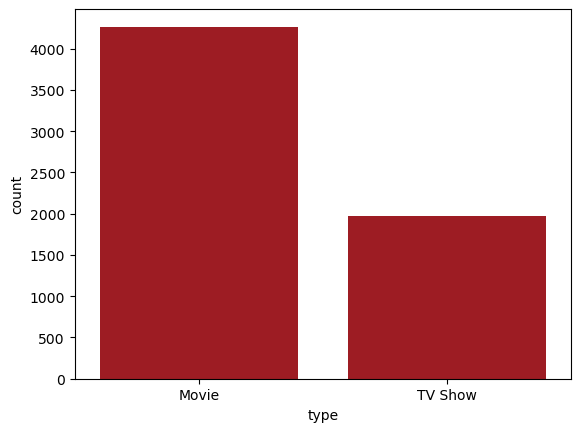

In [256]:
#looking at number of Movies and TV shows
sns.countplot(x='type',data = df, color= '#b20710')

### 3.1 Visualizing Composition of Content Type (Movies & TV Shows)

In [257]:
# For viz: Ratio of Movies & TV shows

x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

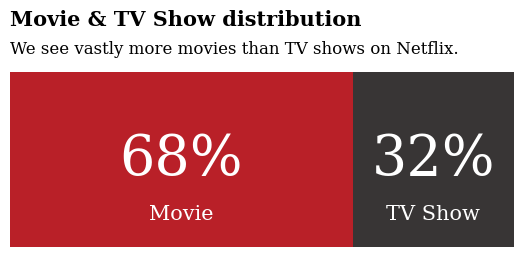

In [258]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(mf_ratio.index, fontfamily='serif', fontsize=11)


# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

### 3.2 Countries producing maximum content on Netflix

In [259]:
# countries with the most rated content
country_count=df['country'].value_counts().sort_values(ascending=False) 
country_count=pd.DataFrame(country_count)
topcountry=country_count[0:11]
topcountry

,country
United States,2508
India,777
United Kingdom,348
Japan,176
Canada,141
South Korea,136
Spain,117
France,90
Mexico,83
Turkey,79


#### By Country
So we now know there are much more movies than TV shows on Netflix (which surprises me!).

What about if we look at content by country?

I would imagine that the USA will have the most content. I wonder how my country, the UK, will compare?

In [260]:
# Quick feature engineering

# Helper column for various plots
df['count'] = 1

# Many productions have several countries listed - this will skew our results , we'll grab the first one mentioned

# Lets retrieve just the first country
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].head()
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()
# Genre

df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

# Reducing name length

df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

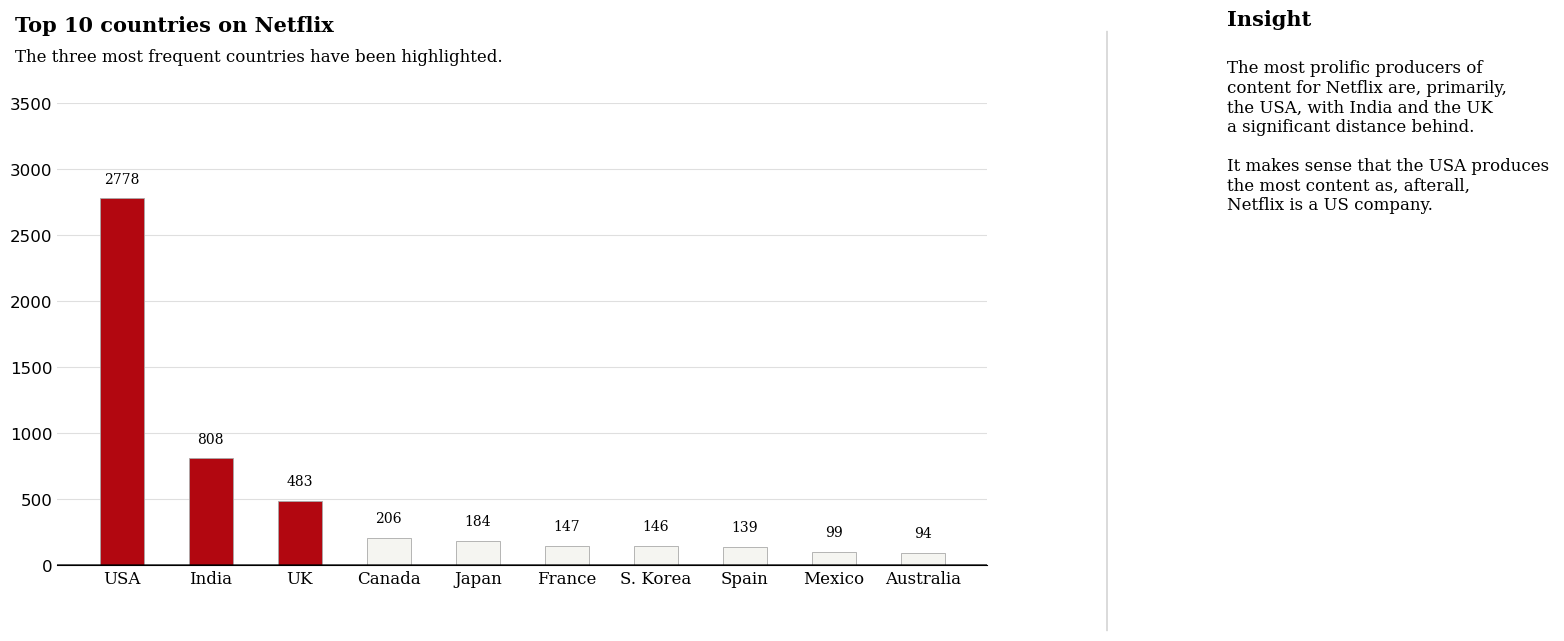

In [261]:
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

# Plot

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 150), #i like to change this to roughly 5% of the highest cat
                va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Top 10 countries on Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
The most prolific producers of
content for Netflix are, primarily,
the USA, with India and the UK
a significant distance behind.

It makes sense that the USA produces 
the most content as, afterall, 
Netflix is a US company.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)

l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

As predicted, the USA dominates.

The UK is a top contender too, but still some way behind India.

How does content by country vary?

### 3.3 Country-wise Composition of Content Type

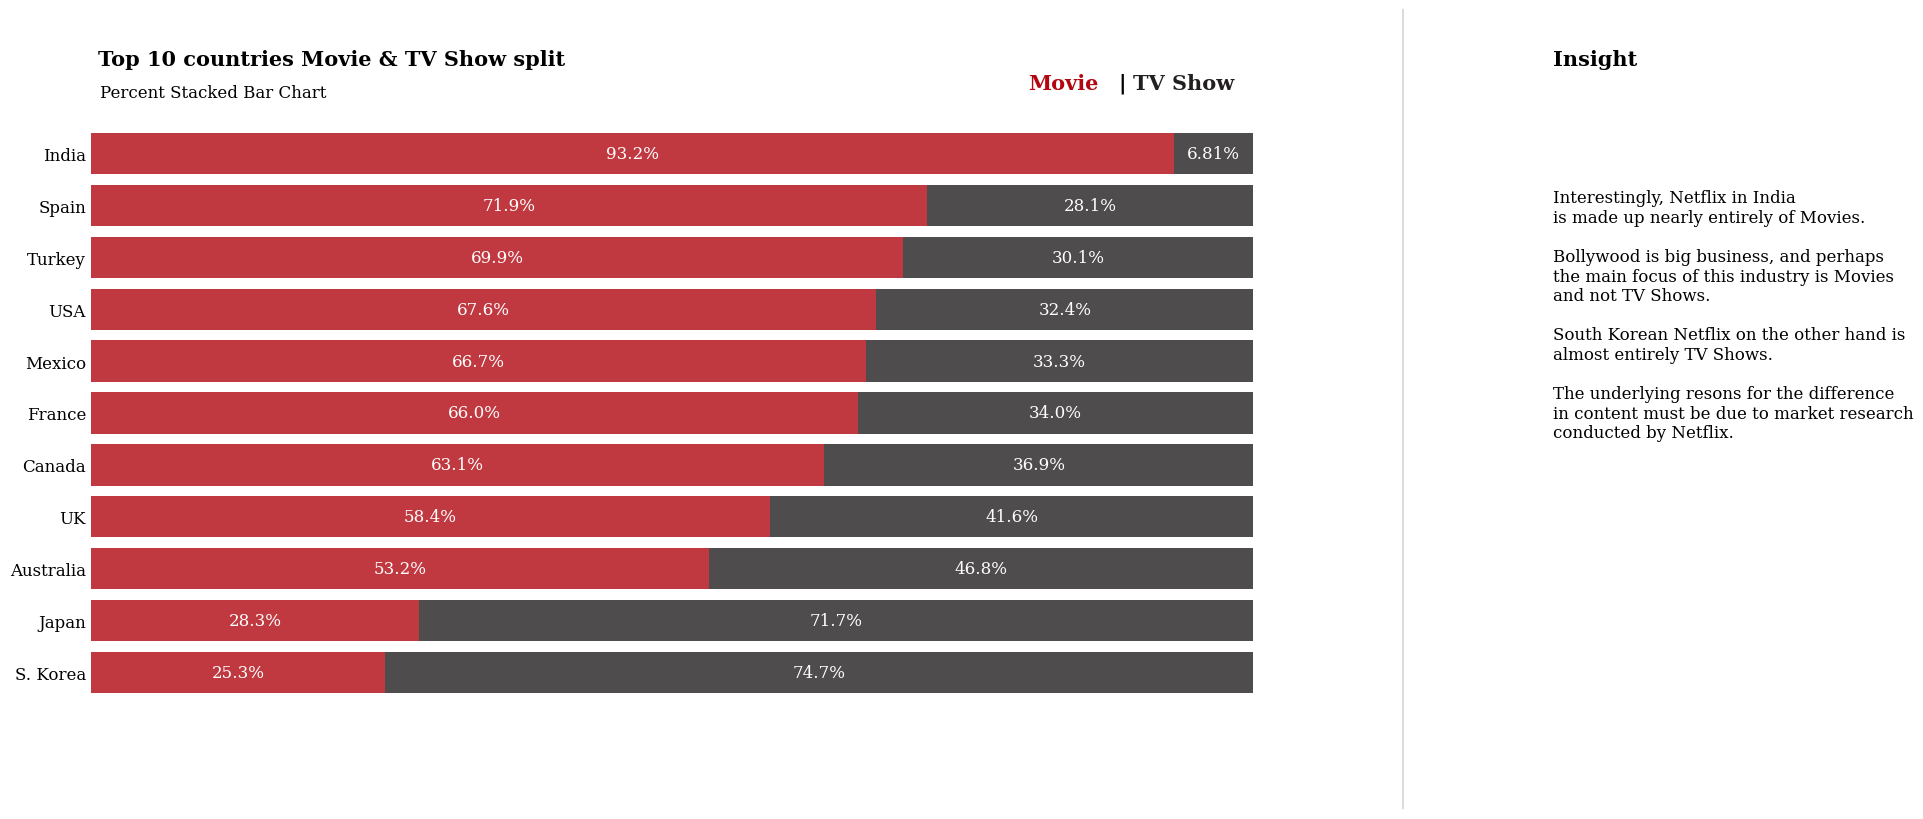

In [262]:
country_order = df['first_country'].value_counts()[:11].index
data_q2q3 = df[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

###
fig, ax = plt.subplots(1,1,figsize=(15, 8),)
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.44, '''
Interestingly, Netflix in India
is made up nearly entirely of Movies. 

Bollywood is big business, and perhaps
the main focus of this industry is Movies
and not TV Shows.

South Korean Netflix on the other hand is 
almost entirely TV Shows.

The underlying resons for the difference 
in content must be due to market research
conducted by Netflix.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

As I've noted in the insights on the plot, it is really interesting to see how the split of TV Shows and Movies varies by country.

South Korea is dominated by TV Shows - why is this? I am a huge fan of South Korean cinema so I know they have a great movie selection.

Equally, India is dominated by Movies. I think this might be due to Bollywood - comment below if you have any other ideas!

### 3.4 Visualizing Composition of Content Rating

<AxesSubplot:xlabel='rating', ylabel='count'>

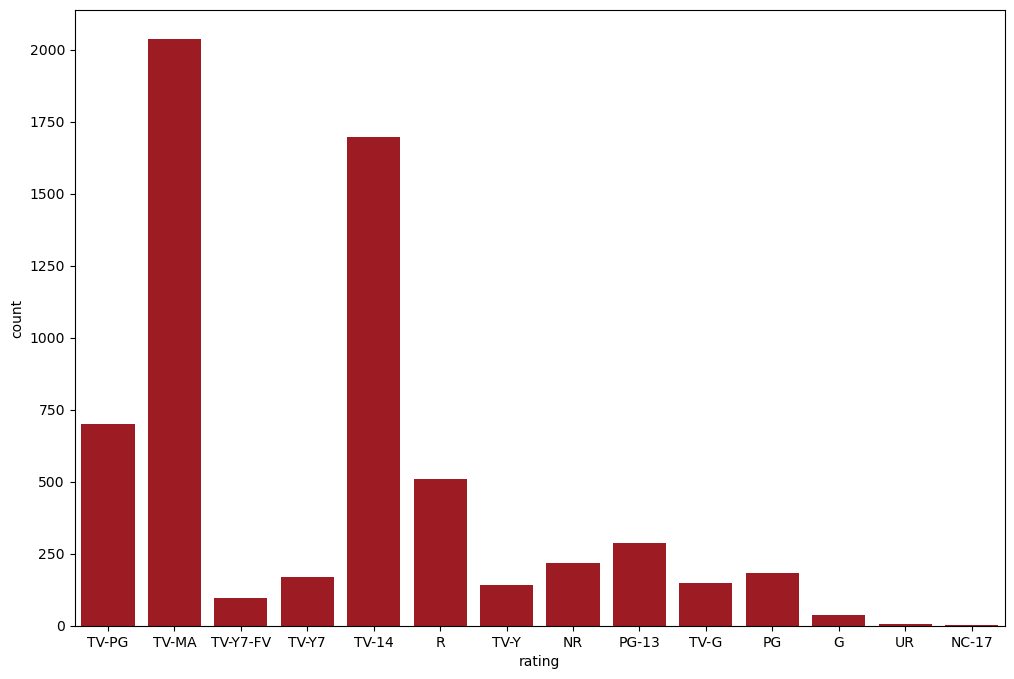

In [263]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df, color='#b20710')

### 3.5 Qualitative Distribution of Content Type Across Maturity Ratings

<AxesSubplot:xlabel='rating', ylabel='type'>

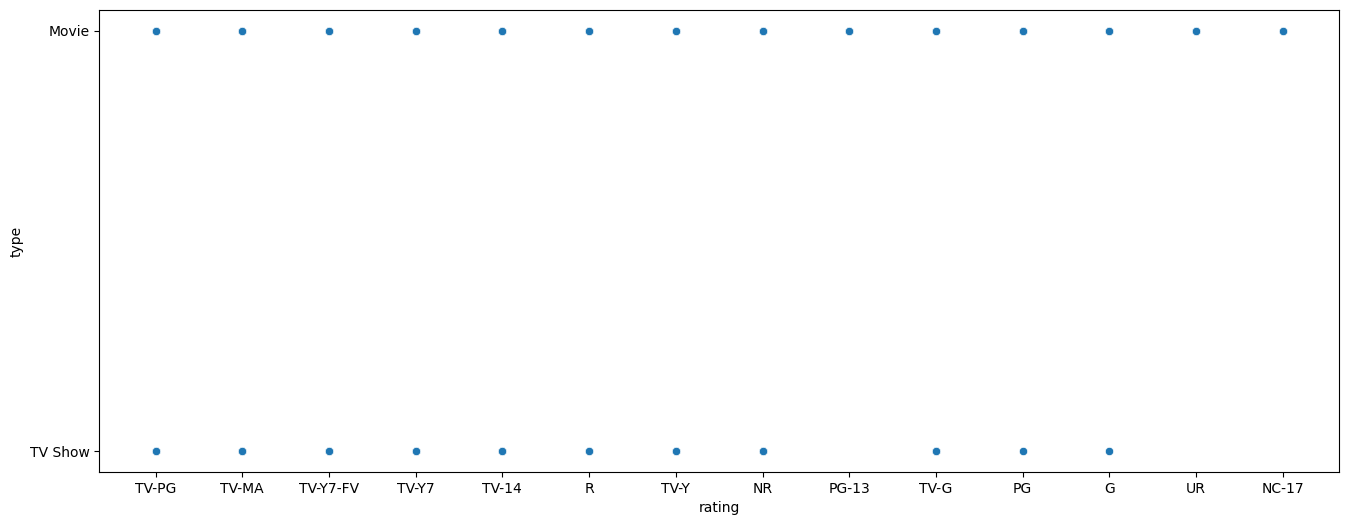

In [264]:
#analysing the type, whether its a movie or a movie v/s the rating it has
plt.figure(figsize=(16,6))
sns.scatterplot(x='rating',y='type',data = df)

### 3.6 Quantitative Distribution of Content Type Across Maturity Ratings

## Ratings
Let's briefly check out how ratings are distributed

In [265]:
order = pd.DataFrame(df.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

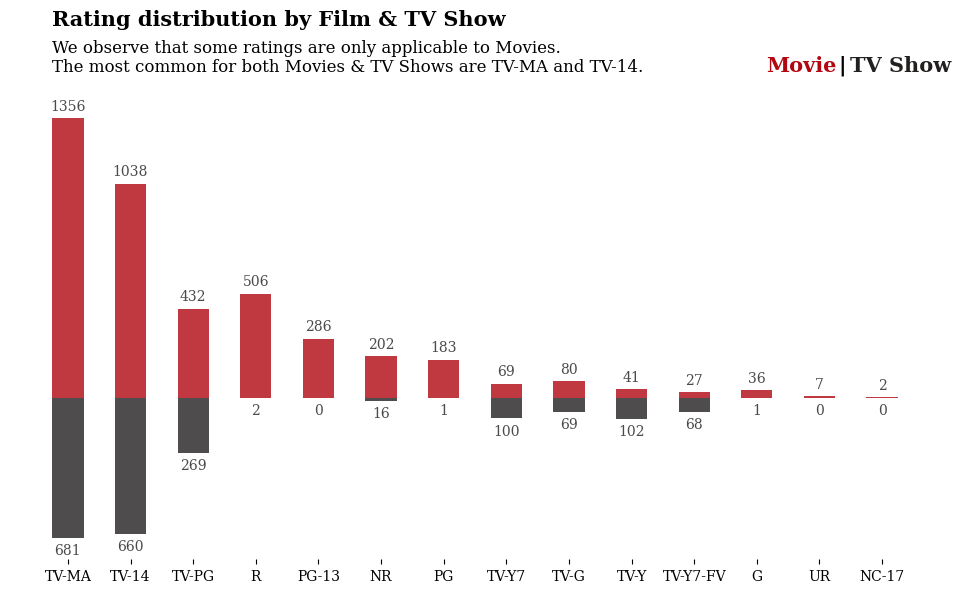

In [266]:
mf = df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                                   color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',color='#4a4a4a')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.16, 1, 'Rating distribution by Film & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.89, 
'''We observe that some ratings are only applicable to Movies. 
The most common for both Movies & TV Shows are TV-MA and TV-14.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')
plt.show()

### 3.7 Count of Maturity Ratings for each Content Type

<AxesSubplot:xlabel='rating', ylabel='count'>

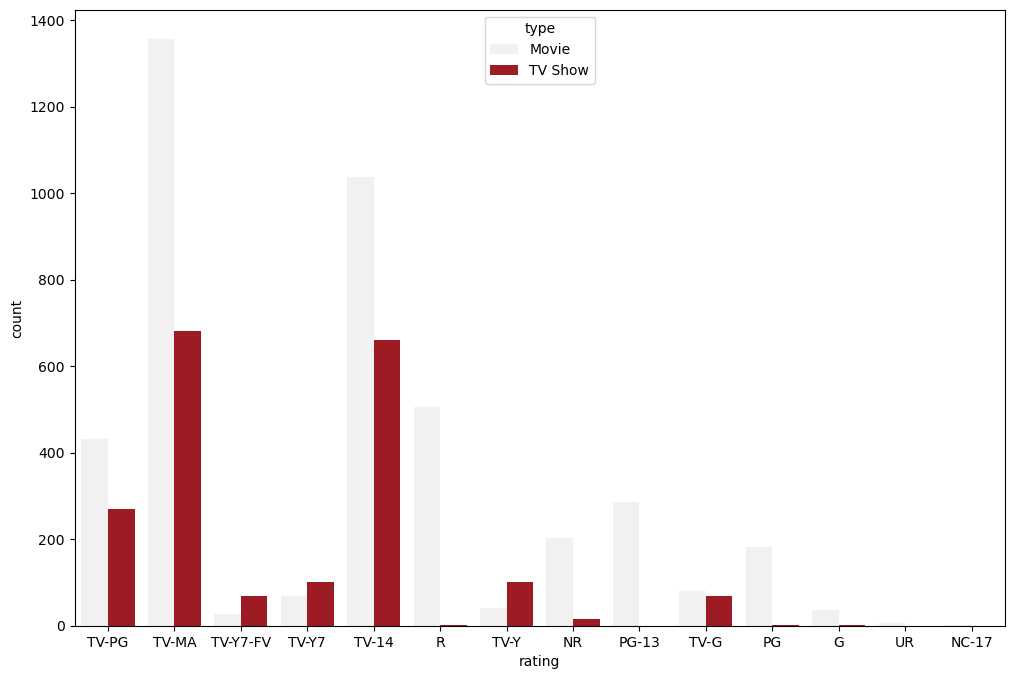

In [267]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df,hue='type', color='#b20710')

### 3.8 Composition of Content Ratings

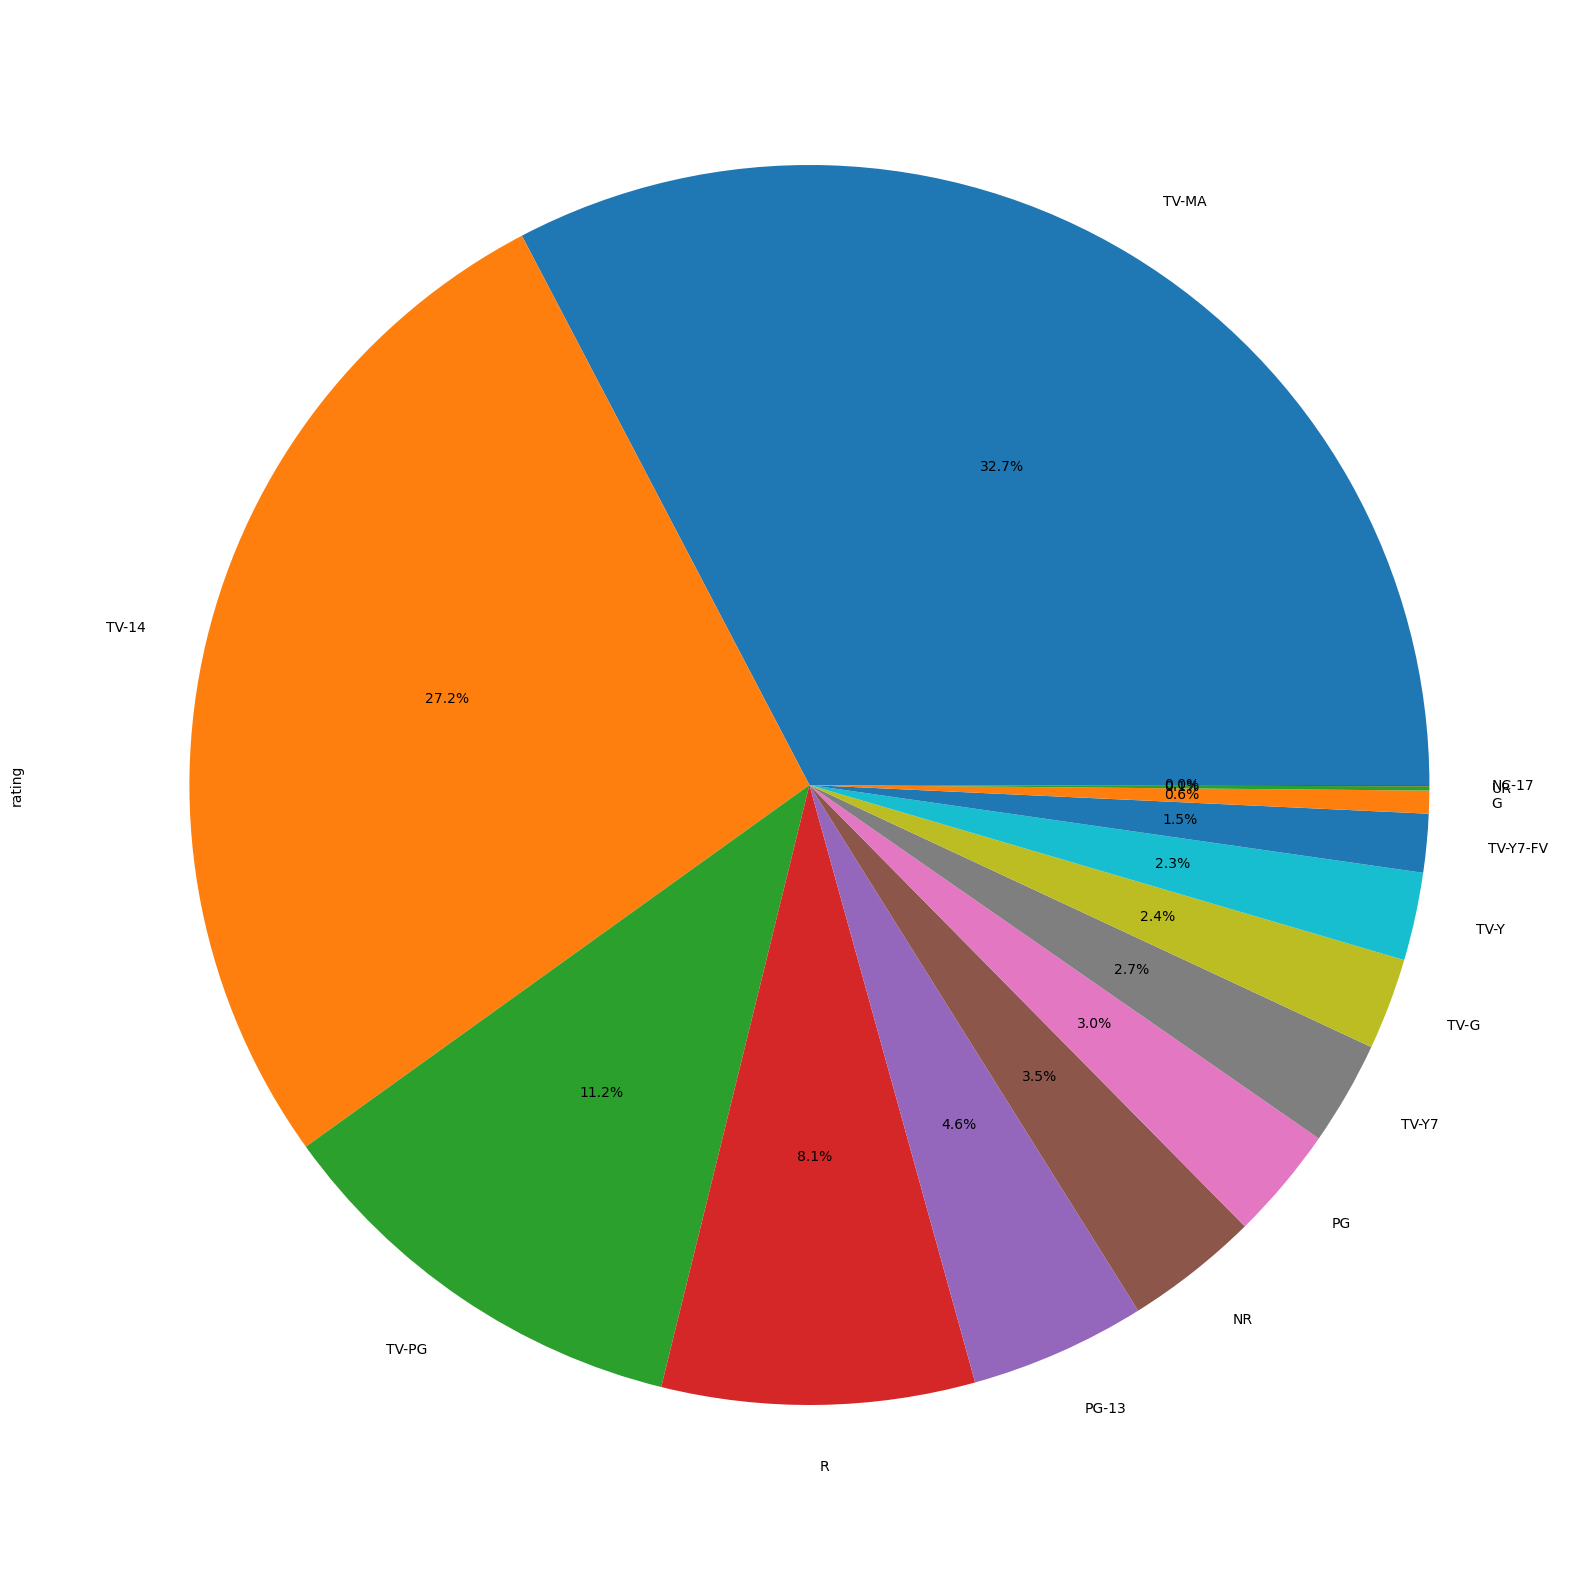

In [268]:
# distribution according to the rating
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(20,30))
plt.show()

## 4.0 Evolution of Netflix Content & its Type over time

How has content been added over the years?
As we saw in the timeline at the start of this analysis, Netflix went global in 2016 - and it is extremely noticeable in this plot.

The increase is Movie content is remarkable.

In [269]:
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,count,first_country,target_ages,genre,month_added,month_name_added,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,1,USA,Older Kids,"[Children & Family Movies, Comedies]",9.0,September,2019.0
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,1,UK,Adults,[Stand-Up Comedy],9.0,September,2016.0
2,70234439,TV Show,Transformers Prime,United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",1,USA,Older Kids,[Kids' TV],9.0,September,2018.0


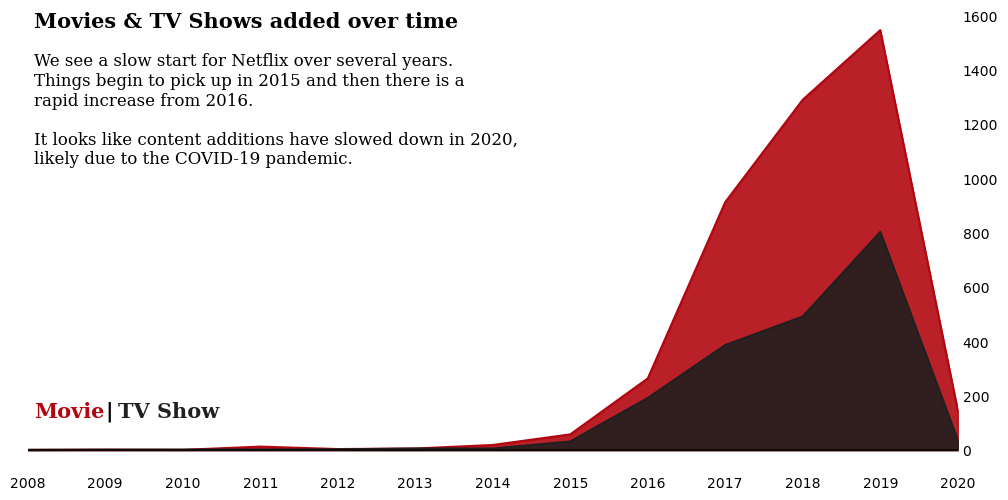

In [270]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = df[df['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)


ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.59, 
'''We see a slow start for Netflix over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

<AxesSubplot:xlabel='release_year', ylabel='count'>

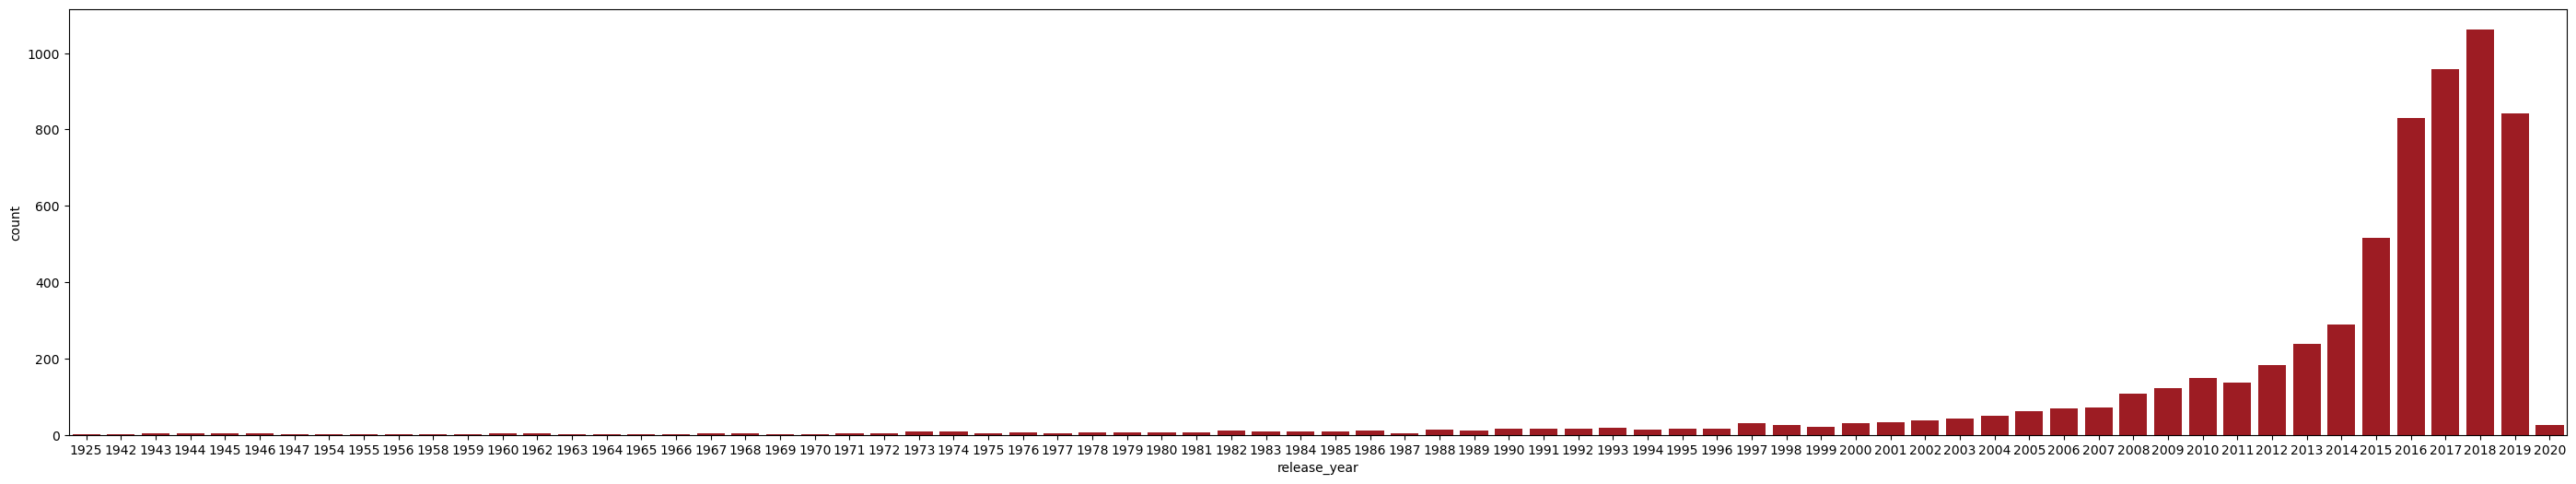

In [271]:
plt.figure(figsize = (35,6))
sns.countplot(x='release_year',data = df, color='#b20710')

As we can see, the majority of the movies and television shows on Netflix were released in the last decade, with only a few exceptions released earlier.

Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

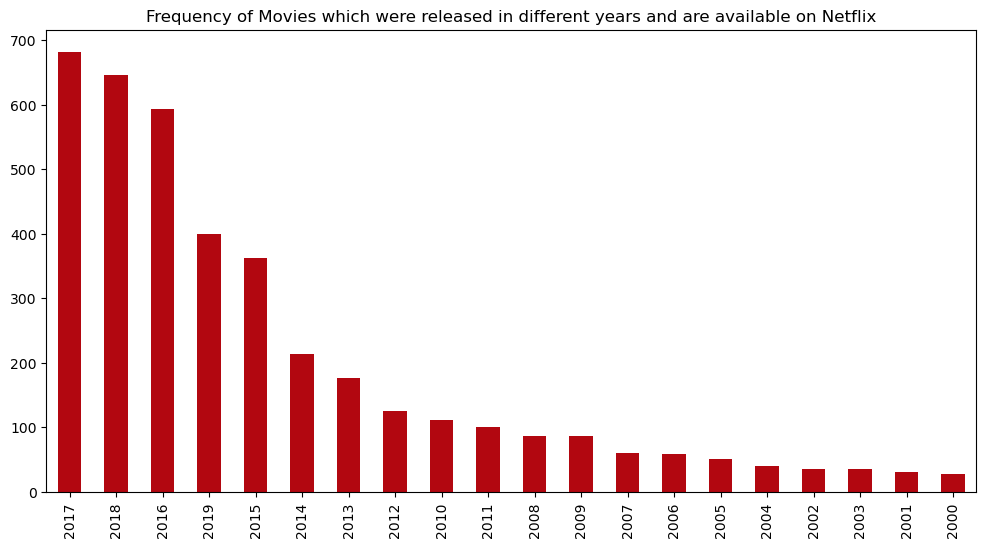

In [272]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="#b20710")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Frequency of TV shows which were released in different years and are available on Netflix')

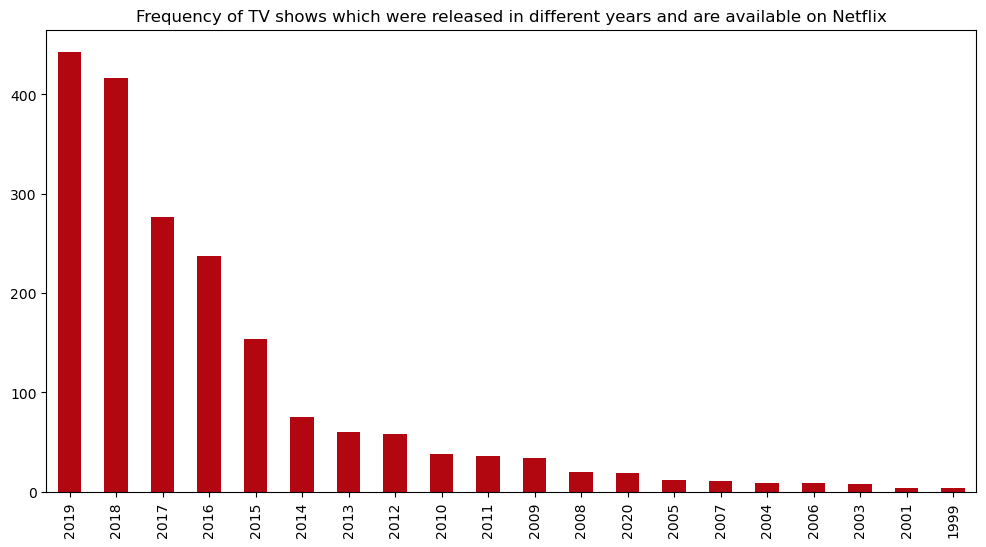

In [273]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="#b20710")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix")

In [274]:
top_rated=df[0:10]
fig =px.sunburst(
    top_rated,
    path=['country'])
fig.show()

## 5.0 Study of Genres Correlations

#### Movie Genres
Let's now explore movie genres a little...

In [275]:
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])



def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.
             ''', fontfamily='serif',fontsize=12,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()

There are 20 types in the Netflix Movie Dataset


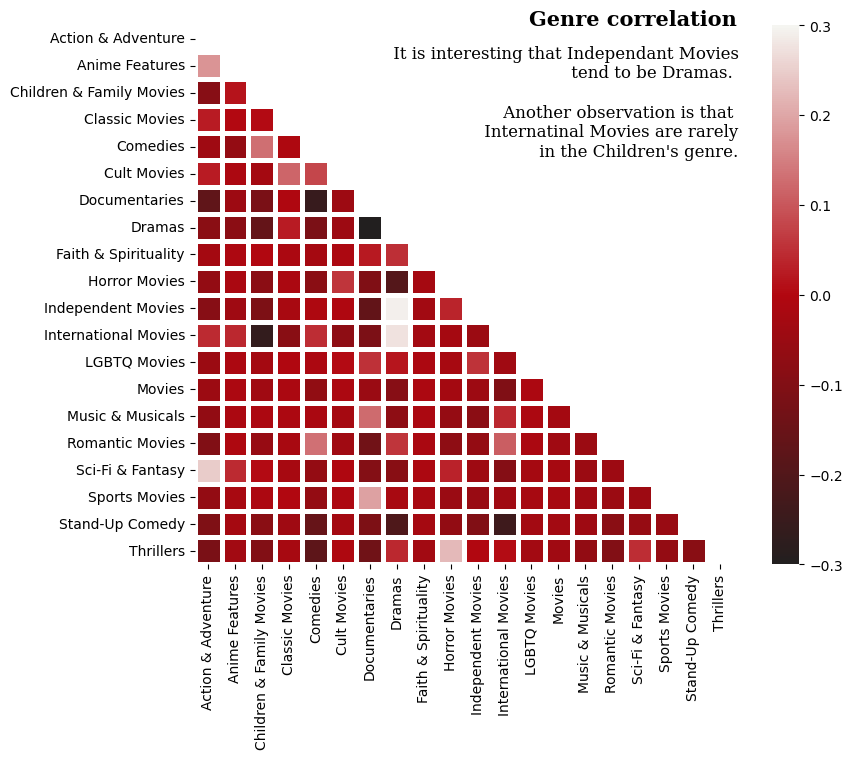

In [276]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]


genre_heatmap(df_movies, 'Movie')
plt.show()

Text(0.5, 1.0, 'Top 10 Genres of Movies')

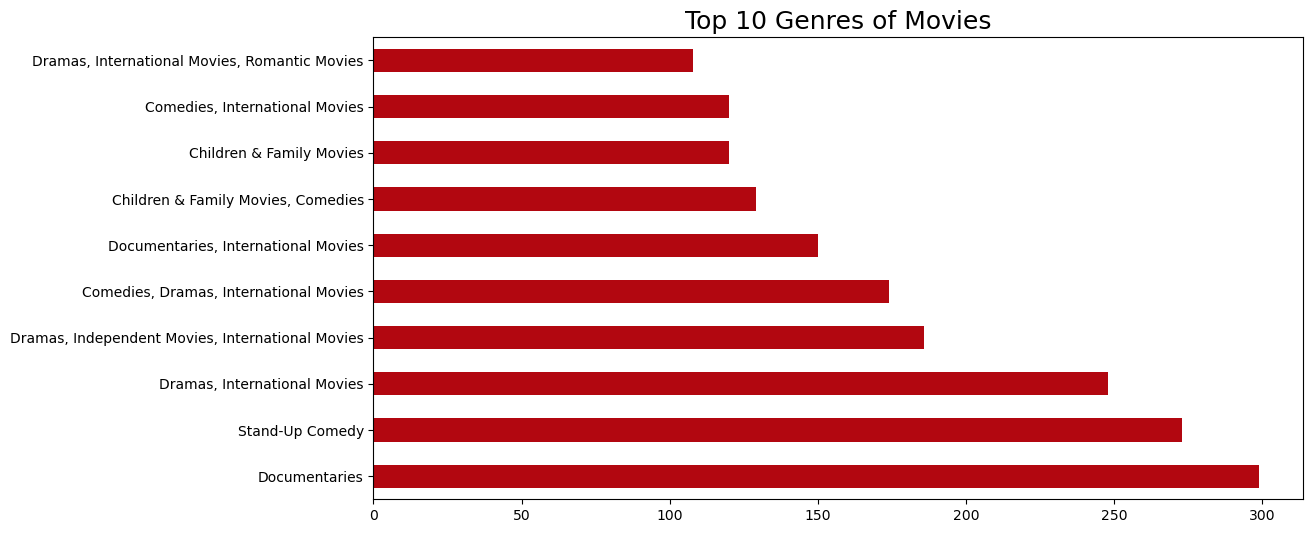

In [277]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="#b20710")
plt.title("Top 10 Genres of Movies",size=18)

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

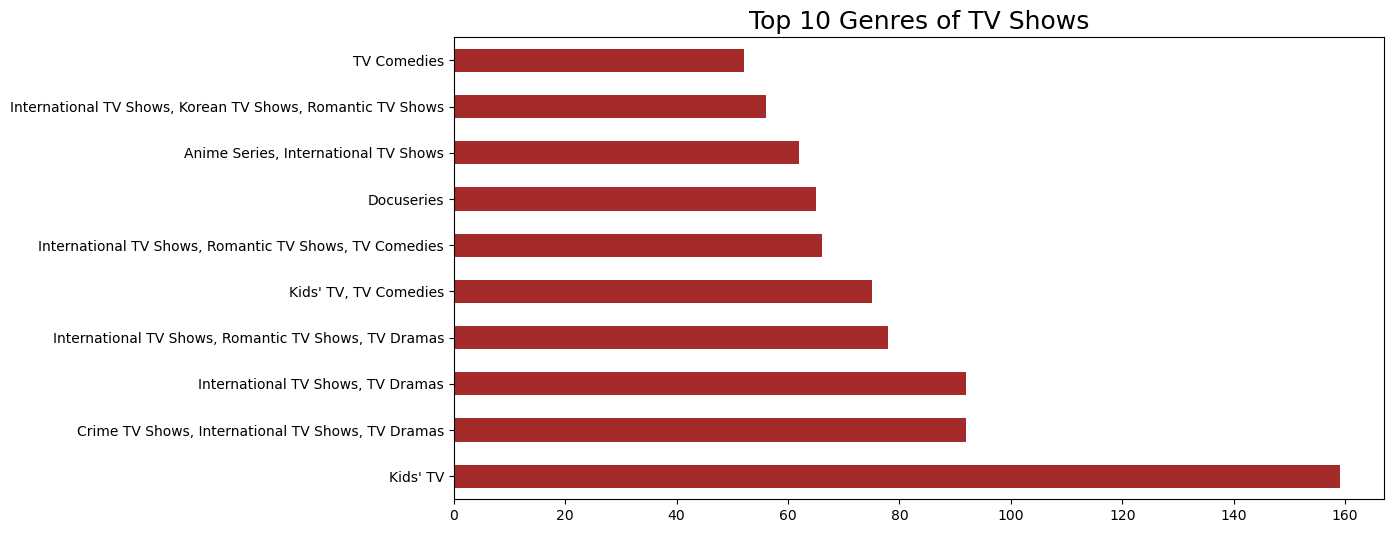

In [278]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="brown")
plt.title("Top 10 Genres of TV Shows",size=18)

## 6.0 Distribution of target audiences for each country

In [279]:
df_countries = pd.DataFrame(df.country.value_counts().reset_index().values, columns=["country", "count"])
df_countries.head()

,country,count
0,United States,2508
1,India,777
2,United Kingdom,348
3,Japan,176
4,Canada,141


In [280]:
# distribution of content on basis of countries
fig = px.choropleth(
    locationmode='country names',
    locations=df_countries.country,
    labels=df_countries["count"],
)
fig.show()

### Showing the output in a new html webpage

In [281]:
#html
fig.write_html("netflix.html", auto_open=True)

#### Target Ages
Does Netflix uniformly target certain demographics? Or does this vary by country?

In [282]:
data = df.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']


df_heatmap = df.loc[df['first_country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['first_country'],df_heatmap['target_ages'],normalize = "index").T

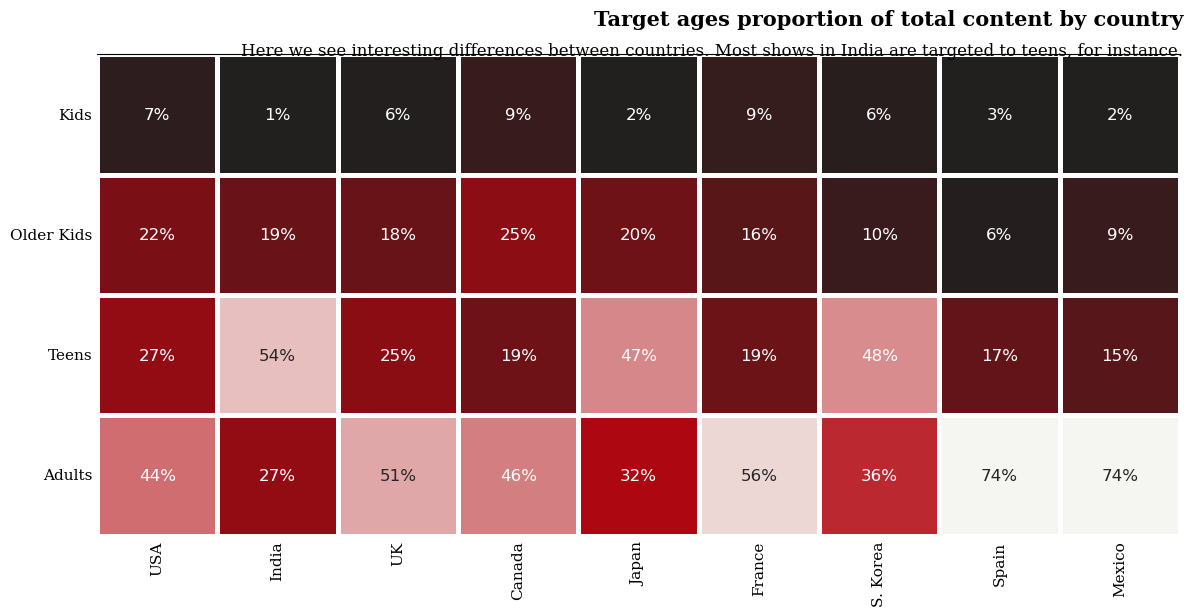

In [283]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['USA', 'India', 'UK', 'Canada', 'Japan', 'France', 'S. Korea', 'Spain', 'Mexico']

age_order = ['Kids','Older Kids','Teens','Adults']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)


fig.text(.99, .725, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')
fig.text(0.99, 0.7, 'Here we see interesting differences between countries. Most shows in India are targeted to teens, for instance.',ha='right', fontsize=12,fontfamily='serif') 

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

Very interesting results.

It is also interesting to note similarities between culturally similar countries - the US & UK are closey aligned with their Netflix target ages, yet vastly different to say, India or Japan!

### 6.1 Studying the gap between release and upload of content in different countries

#### Let's have a quick look at the lag between when content is released and when it is added on Netflix
Spain looks to have a lot of new content. Great for them!

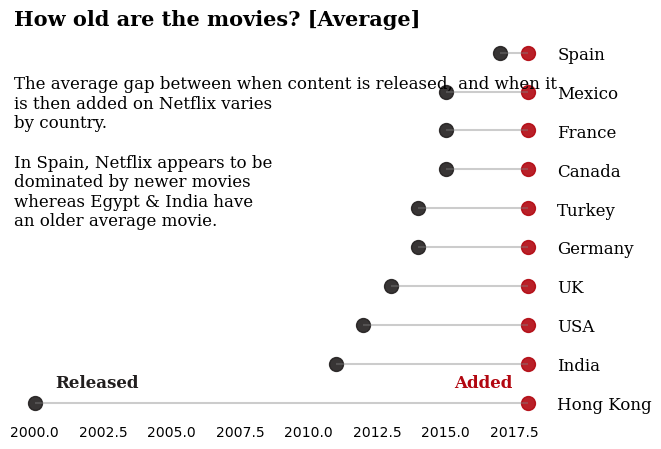

In [284]:
### Relevant groupings

data = df_movies.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = df_movies.loc[df_movies['first_country'].isin(data)]

loli = df_loli.groupby('first_country')['release_year','year_added'].mean().round()


# Reorder it following the values of the first value
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

fig.text(0.13, 0.9, 'How old are the movies? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#b20710',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

# Removes the tick marks but keeps the labels
ax.tick_params(axis=u'both', which=u'both',length=0)
# Move Y axis to the right side
ax.yaxis.tick_right()

plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=12)

# Custome legend
fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')
fig.text(0.76,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')


fig.text(0.13, 0.46, 
'''The average gap between when content is released, and when it
is then added on Netflix varies
by country. 

In Spain, Netflix appears to be 
dominated by newer movies 
whereas Egypt & India have
an older average movie.
'''

, fontsize=12, fontweight='light', fontfamily='serif')

#plt.xlabel('Year')
#plt.ylabel('Country')
plt.show()

What about TV shows...

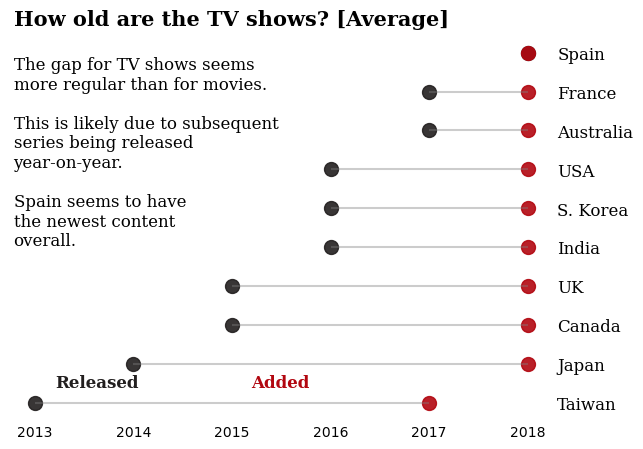

In [285]:
data = df_tv.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = df_tv.loc[df_tv['first_country'].isin(data)]

loli = df_loli.groupby('first_country')['release_year','year_added'].mean().round()


# Reorder it following the values of the first value:
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

fig.text(0.13, 0.9, 'How old are the TV shows? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#b20710',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.yaxis.tick_right()
plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=12)


fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')

fig.text(0.47,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')


fig.text(0.13, 0.42, 
'''The gap for TV shows seems
more regular than for movies.

This is likely due to subsequent
series being released
year-on-year.

Spain seems to have
the newest content
overall.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


ax.tick_params(axis=u'both', which=u'both',length=0)
#plt.xlabel('Value of the variables')
#plt.ylabel('Group')
plt.show()

### 6.2 Comparing the netflix content of USA & India 

#### USA & India
As the two largest content countries, it might be fun to compare the two

In [286]:
us_ind = df[(df['first_country'] == 'USA') | (df['first_country'] == 'India' )]

data_sub = df.groupby('first_country')['year_added'].value_counts().unstack().fillna(0).loc[['USA','India']].cumsum(axis=0).T

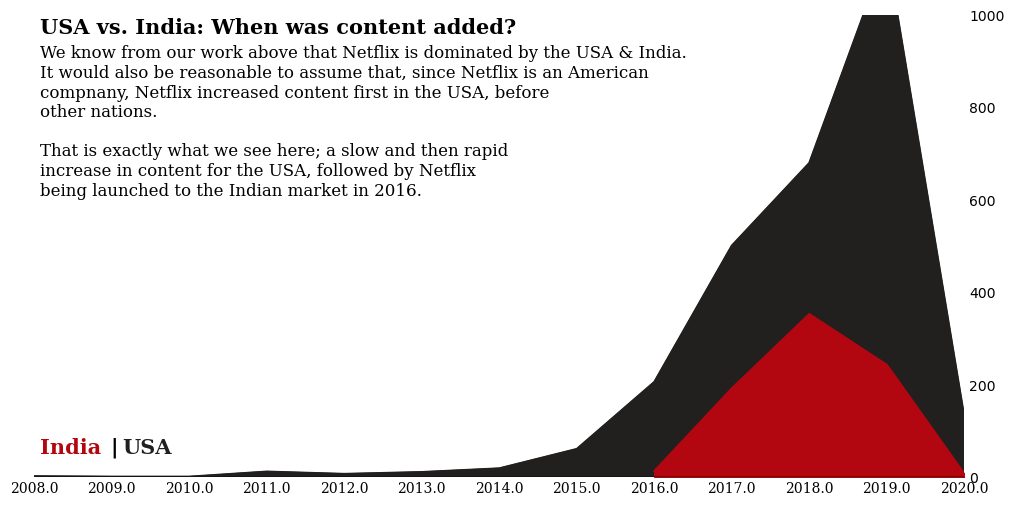

In [287]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ['#221f1f', '#b20710','#f5f5f1']

for i, hs in enumerate(us_ind['first_country'].value_counts().index):
    hs_built = us_ind[us_ind['first_country']==hs]['year_added'].value_counts().sort_index()
    ax.plot(hs_built.index, hs_built, color=color[i], label=hs)
    #ax.fill_between(hs_built.index, 0, hs_built, color=color[i], alpha=0.4)
    ax.fill_between(hs_built.index, 0, hs_built, color=color[i], label=hs)
    

ax.set_ylim(0, 1000)
#ax.legend(loc='upper left')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.yaxis.tick_right()
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'USA vs. India: When was content added?', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.58, 
'''
We know from our work above that Netflix is dominated by the USA & India.
It would also be reasonable to assume that, since Netflix is an American
compnany, Netflix increased content first in the USA, before 
other nations. 

That is exactly what we see here; a slow and then rapid
increase in content for the USA, followed by Netflix 
being launched to the Indian market in 2016.'''

, fontsize=12, fontweight='light', fontfamily='serif')



fig.text(0.13,0.15,"India", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.188,0.15,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.198,0.15,"USA", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)


plt.show()

### Saving the file as jpg

In [288]:
fig.savefig('india_usa_content.jpg')

So the USA dominates. Lemme do this other way around....

In [289]:
us_ind = df[(df['first_country'] == 'USA') | (df['first_country'] == 'India' )]

data_sub = df.groupby('first_country')['year_added'].value_counts().unstack().fillna(0).loc[['USA','India']].cumsum(axis=0).T
data_sub.insert(0, "base", np.zeros(len(data_sub)))

data_sub = data_sub.add(-us_ind['year_added'].value_counts()/2, axis=0)

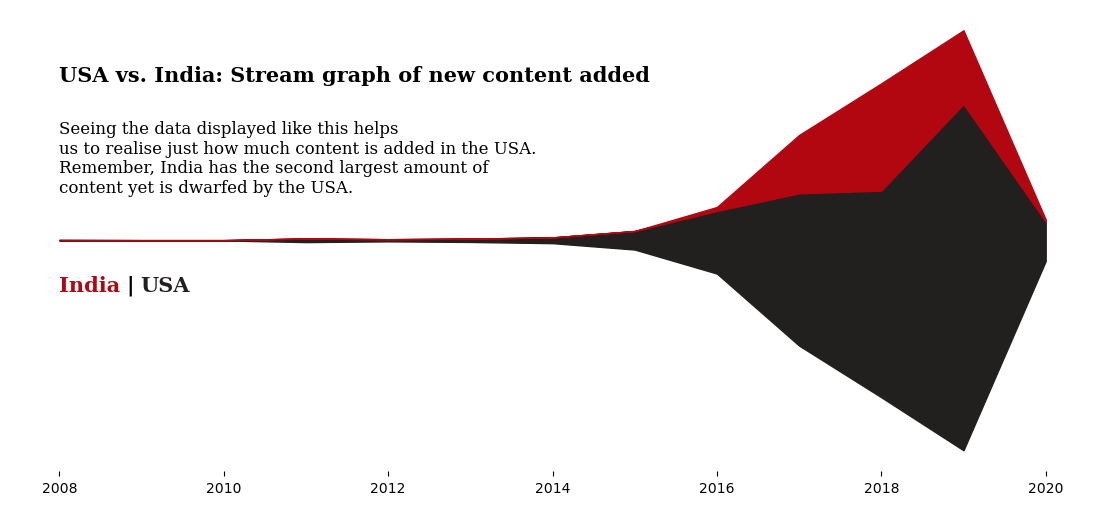

In [290]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
color = ['#b20710','#221f1f'][::-1]
hs_list = data_sub.columns
hs_built = data_sub[hs]

for i, hs in enumerate(hs_list):
    if i == 0 : continue
    ax.fill_between(hs_built.index, data_sub.iloc[:,i-1], data_sub.iloc[:,i], color=color[i-1])
    
for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)
ax.set_axisbelow(True)
ax.set_yticks([])
#ax.legend(loc='upper left')
ax.grid(False)

fig.text(0.16, 0.76, 'USA vs. India: Stream graph of new content added', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.575, 
'''
Seeing the data displayed like this helps 
us to realise just how much content is added in the USA.
Remember, India has the second largest amount of
content yet is dwarfed by the USA.'''

, fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.16,0.41,"India", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.208,0.41,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.218,0.41,"USA", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')
ax.tick_params(axis=u'y', which=u'both',length=0)

plt.show()

### Saving the file as jpeg

In [291]:
fig.savefig('india_usa_stream.jpeg')

## 7.0 WordCloud

We have taken the title column to display the wordcloud. Instead of using the normal wordcloud, we have built the cloud in the logo of netflix.

### Saving the image as png

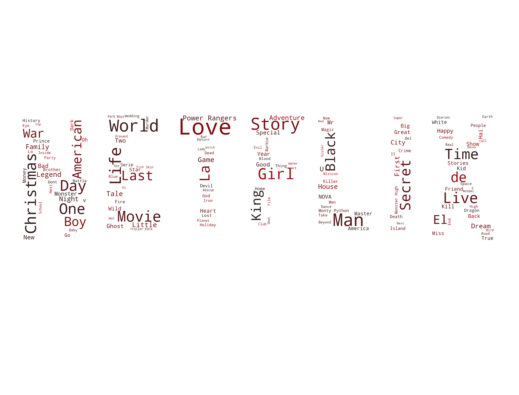

In [292]:
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

mask = np.array(Image.open('C:\\Users\\mubas\\Downloads\\netflix.JPG'))
# print(mask)

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150, mask = mask).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
# Saving the image as png
plt.savefig('title.png')
plt.show()

## 8.0 ML Classification Model
We have labels of 10 ratings, and the number of rows of data we have is very less so making a classifier using all the 14 labels would be very difficult.

Hence, we need to reduce the number of labels to 3, we have taken the top two categories and remaining as other.

In [293]:
labels = df['rating'].unique()
labels_count = df['rating'].value_counts()
label_dict = {}
for i in range(len(labels)):
    if labels[i] in labels_count[:2]:
        label_dict.update({labels[i]:i})
    else:
        label_dict.update({labels[i]:10})
# label_dict.update({'TV-PG': 5})
label_dict

{'TV-PG': 10,
 'TV-MA': 1,
 'TV-Y7-FV': 10,
 'TV-Y7': 10,
 'TV-14': 4,
 'R': 10,
 'TV-Y': 10,
 'NR': 10,
 'PG-13': 10,
 'TV-G': 10,
 'PG': 10,
 'G': 10,
 'UR': 10,
 'NC-17': 10}

In [294]:
df['rating_labels'] = df['rating'].map(label_dict)
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,count,first_country,target_ages,genre,month_added,month_name_added,year_added,rating_labels
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,1,USA,Older Kids,"[Children & Family Movies, Comedies]",9.0,September,2019.0,10
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,1,UK,Adults,[Stand-Up Comedy],9.0,September,2016.0,1
2,70234439,TV Show,Transformers Prime,United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",1,USA,Older Kids,[Kids' TV],9.0,September,2018.0,10
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,1,USA,Older Kids,[Kids' TV],9.0,September,2018.0,10
4,80125979,Movie,#realityhigh,United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,1,USA,Teens,[Comedies],9.0,September,2017.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",1,USA,Adults,"[TV Action & Adventure, TV Comedies, TV Sci-Fi...",NaN,NaN,NaN,10
6230,70286564,TV Show,Maron,United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",1,USA,Adults,[TV Comedies],NaN,NaN,NaN,1
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,United States,NaT,2016,TV-MA,60 min,Movies,Nursery rhymes and original music for children...,1,USA,Adults,[Movies],NaN,NaN,NaN,1
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",1,UK,Adults,"[British TV Shows, TV Comedies, TV Dramas]",NaN,NaN,NaN,1


We will be splitting the data manually because using train_test_split there is no guarantee that the data will be splitted qullay on ecah category.

In [295]:
trains = []
tests = []
for i in df['rating_labels'].unique():
    split_train = round(df[df['rating_labels'] == i].shape[0]*0.8)
    trains.append(df[df['rating_labels'] == i][:split_train])
    tests.append(df[df['rating_labels'] == i][split_train:])
train = pd.concat(trains, ignore_index= True)
test = pd.concat(tests, ignore_index=True)

In [296]:
X_train = train["description"]
X_test = test["description"]
y_train = train["rating_labels"]
y_test = test["rating_labels"]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4987,)
(1247,)
(4987,)
(1247,)


TfiDfvectorizer has been used to convert the description labels to array of numbers whcih can be used in Naive Bayes model and Logistic Regression for training.

In [297]:
# instantiate the vectorizer
vectorizer = TfidfVectorizer()
# fit
vectorizer.fit(X_train)
# transform training data
X_train_dtm = vectorizer.transform(X_train)
# equivalently: combine fit and transform into a single step
# this is faster and what most people would do
X_train_dtm = vectorizer.fit_transform(X_train)
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vectorizer.transform(X_test)
# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()
# using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)
y_pred_prob = nb.predict_proba(X_test_dtm)
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

Wall time: 0 ns


0.6850239077080807

In [298]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           1       0.52      0.28      0.36       407
           4       0.32      0.03      0.05       340
          10       0.45      0.91      0.60       500

    accuracy                           0.46      1247
   macro avg       0.43      0.40      0.34      1247
weighted avg       0.44      0.46      0.37      1247



#### Logistic Regression is a lot slower when compared to Naive Baye's.

In [299]:
# instantiate a logistic regression model
logreg = LogisticRegression()
# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

Wall time: 675 ms


0.675359292316342

In [300]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           1       0.49      0.41      0.45       407
           4       0.40      0.21      0.27       340
          10       0.52      0.77      0.62       500

    accuracy                           0.50      1247
   macro avg       0.47      0.46      0.45      1247
weighted avg       0.48      0.50      0.47      1247



## 9.0 Interpreting the result

In an effort to keep the audience interested, we sought to demonstrate various visualisation techniques. Plots allows in enhancing our ability to convey our views which helps others understand things in a simpler way.